In [2]:
import pandas as pd

In [3]:
native_filepath = "E:/oyj/042. 서울시 업종별 내외국인 신한카드 매출데이터/2. 파일데이터/2. 내국인(집계구)_성별연령대별/SEOUL_KOR_TOTREG_DEMO_"

In [19]:
def get_data(filepath,y,m):
    data = pd.read_csv(filepath + y + m +".txt"
               , sep='|',encoding='utf-8',quotechar='`') 
    data = data.groupby(['일별']).sum()    
    data = data.reset_index()
    data = data[['일별', '카드이용금액계']]
    data['카드이용금액계'] = data['카드이용금액계']/10000000
    return data

In [7]:
data = pd.read_csv(native_filepath + "18" + "01" +".txt"
               , sep='|',encoding='utf-8',quotechar='`') 

In [9]:
data = data.groupby(['일별']).sum()

In [11]:
data = data.reset_index()

In [16]:
data = data[['일별', '카드이용금액계']]

In [17]:
data['카드이용금액계'] = data['카드이용금액계']/10000000

In [20]:
# data

In [21]:
def save_datedata():
    new_data = pd.DataFrame()
    year = ['18','19','20']
    month = ['01','02','03','04','05','06','07','08','09','10','11','12']
    for y in year:
        for m in month:
            data = get_data(native_filepath,y,m)
            new_data = pd.concat([new_data,data])
    new_data.to_csv('E:/oyj/result3/datedata.csv')

In [24]:
save_datedata()

# LSTM 모델링

In [34]:
modeling_data = pd.read_csv('E:/oyj/result3/datedata.csv')
modeling_data = modeling_data[['일별','카드이용금액계']]
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
일별         1096 non-null int64
카드이용금액계    1096 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [35]:
modeling_data['일별'] = modeling_data['일별'].astype('str')
modeling_data['일별'] = pd.to_datetime(modeling_data['일별'])

In [36]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus']=False

Text(0.5, 1.0, '내국인 사용내역')

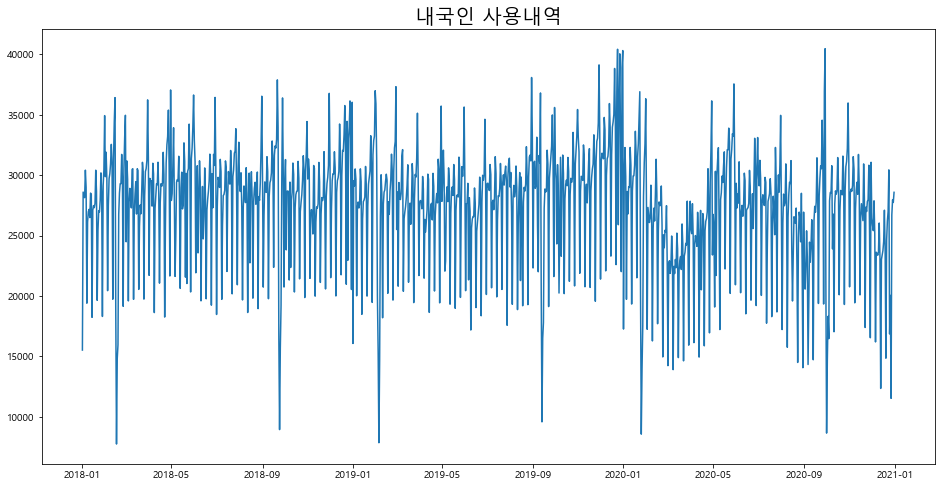

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(modeling_data['일별'],modeling_data['카드이용금액계'])
plt.title('내국인 사용내역',fontsize =20)

In [38]:
result1 = modeling_data.sort_values(by=['카드이용금액계'], ascending=[True])[:15]
result1['일별']

46     2018-02-16
400    2019-02-05
754    2020-01-25
1004   2020-10-01
266    2018-09-24
620    2019-09-13
1091   2020-12-27
1077   2020-12-13
797    2020-03-08
755    2020-01-26
972    2020-08-30
790    2020-03-01
979    2020-09-06
965    2020-08-23
811    2020-03-22
Name: 일별, dtype: datetime64[ns]

In [8]:
result2 = modeling_data.sort_values(by=['카드이용금액계'], ascending=[False])[:15]
result2['일별']

1002   2020-09-29
722    2019-12-24
729    2019-12-31
725    2019-12-27
697    2019-11-29
728    2019-12-30
718    2019-12-20
606    2019-08-30
263    2018-09-21
879    2020-05-29
423    2019-02-28
119    2018-04-30
395    2019-01-31
1001   2020-09-28
752    2020-01-23
Name: 일별, dtype: datetime64[ns]

In [39]:
year = '2019-06-01'

In [40]:
train = modeling_data[(modeling_data['일별']<year)]
test = modeling_data[(modeling_data['일별']>=year)]

In [41]:
train_v = train.filter(['카드이용금액계']).values
test_v = test.filter(['카드이용금액계']).values

### 데이터 정규화

In [42]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

In [43]:
scaled_train = scalar.fit_transform(train_v)
scaled_test = scalar.fit_transform(test_v)

### 저장

In [44]:
save_scaled_train = pd.DataFrame()
save_scaled_train['일별'] = train['일별']
save_scaled_train['save_scaled_train'] = list(scaled_train)
save_scaled_train.to_csv('E:/oyj/result3/save_scaled_train.csv')

In [54]:
# save_scaled_train

In [50]:
save_scaled_test = pd.DataFrame()
save_scaled_test['일별'] = test['일별']
save_scaled_test['save_scaled_test'] = list(scaled_test)
save_scaled_test.to_csv('E:/oyj/result3/save_scaled_test.csv')

In [53]:
# save_scaled_test

In [46]:
PAST_SET = 10

In [55]:
# 훈련 데이터는 전체 중 0.8의 비중 
import math
train_len = math.ceil(len(scaled_train)*0.8)

In [56]:
import numpy as np

X_train =[]
y_train =[]

for i in range(PAST_SET, len(scaled_train)):
  X_train.append(scaled_train[i-PAST_SET:i, 0])
  y_train.append(scaled_train[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM은 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### LSTM모델

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_SK_hi.shape[1],1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

ModuleNotFoundError: No module named 'tensorflow'